In [125]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [68]:
N = 100

In [69]:
init_random = np.random.random(N) #Gives a random number from 0.0 to 1.0 open
lattice_n = np.zeros(N)
lattice_n[init_random >= 0.50] = 1
lattice_n[init_random < 0.50] = -1

In [70]:
def fieldEnergy_Ising1d(s, h, beta):
    
    n = np.size(s)
    
    J = 1
    B = h/beta # Field in units of energy, h is the dimensionless LDT parameter
    
    E = 0.0
    
    for j in range(n-1):
        E -= J*s[j]*s[j+1]
        
    E -= J*s[0]*s[n-1] # Correction for PBC
    E -= B*s.sum() # Include the external field
    return E 

In [71]:
fieldEnergy_Ising1d(lattice_n, 10, 0.1)

-800.0

In [72]:
def fieldmetr(spin_arr, steps, beta, energy, h):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(steps-1)
    net_energy = np.zeros(steps-1)
    J = 1 # Spin-Spin interaction
    for t in range(0,steps-1):
        x = np.random.randint(N)
        spin_i = spin_arr[x] #Initial spin
        spin_f = spin_i*(-1) #Proposed spin flip
        
        B = h/beta # Field in units of energy, h is the dimensionless LDT parameter
        
        #Compute change in energy
        E_i = 0
        E_f = 0
        
        E_i += - J*spin_i*spin_arr[x-1] - J*spin_i*spin_arr[(x+1)%N] - B*spin_i
        E_f += - J*spin_f*spin_arr[x-1] - J*spin_f*spin_arr[(x+1)%N] - B*spin_f
        
        
        dE = E_f - E_i
        if (dE>0) and (np.random.random()<np.exp(-beta*dE)):
            spin_arr[x]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x]=spin_f
            energy += dE
            
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy
    
    return net_spins, net_energy

In [118]:
mnew = []
mu = []
gamma = []

for i in range(0, 4000, 1):
    
    h = -i/100 + 20 # Intensity of the field
    gamma.append(h)
    
    spins, energies = fieldmetr(lattice_n, 100000, 0.1, fieldEnergy_Ising1d(lattice_n, h, 0.1), h)
    
    m = spins/N
    mnew = m[-50000:]
    av = np.mean(mnew)
    mu.append(av)   

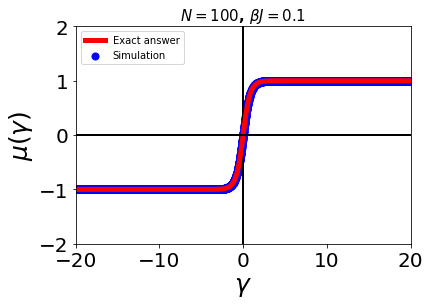

In [119]:
xn = np.arange(-40, 40, 0.1)
N = 100
bJ = 0.1

def cos2theta(x):
    return (np.exp(2*bJ) * np.sinh(x) ) / (np.sqrt(1 + np.exp(4*bJ)*np.sinh(x)*np.sinh(x)))
def lp(x):
    return np.exp(bJ)*np.cosh(x) + np.sqrt(np.exp(2*bJ)*np.cosh(x)*np.cosh(x) - 2*np.sinh(2*bJ))
def lm(x):
    return np.exp(bJ)*np.cosh(x) - np.sqrt(np.exp(2*bJ)*np.cosh(x)*np.cosh(x) - 2*np.sinh(2*bJ))

def eos(x):
    return cos2theta(x)*((lp(x)**N - lm(x)**N)/(lp(x)**N + lm(x)**N))

plt.plot(xn, cos2theta(xn), color='red', lw=5, label='Exact answer')
plt.scatter(gamma, mu, color='blue', s=50, label='Simulation')
plt.plot(xn, 0*xn, color='black', lw=2)
plt.vlines(0, -2, 2, color='black', lw=2)


plt.xlim(-20, 20)
plt.ylim(-2, 2)
plt.xlabel(r'$\gamma$', fontsize='25')
plt.ylabel(r'$\mu(\gamma)$', fontsize='25')
plt.tick_params(labelsize=20)
plt.title(r'$N=100$, $\beta J = 0.1$', fontsize= 15, fontweight='bold')
plt.legend(loc='upper left')
#plt.savefig('/Users/κωτς/Desktop/image6.pdf', transparent=True, bbox_inches='tight')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


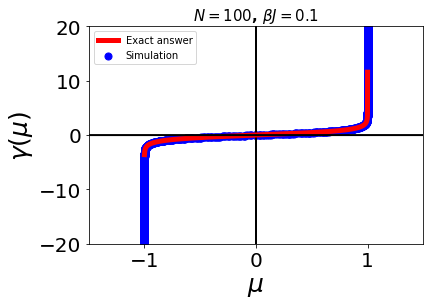

In [120]:
xn = np.arange(-50, 50, 0.001)

def reverseEos(x):
    return np.log( (x*np.exp(-2*bJ) + np.sqrt(1 - x*x*(1 - np.exp(-4*bJ))) )/(np.sqrt(1-x*x)))

plt.scatter(mu, gamma, color='blue', s=50, label='Simulation')
plt.plot(xn, reverseEos(xn), color='red', lw=5, label='Exact answer')
plt.plot(xn, 0*xn, color='black', lw=2)
plt.vlines(0, -20, 20, color='black', lw=2)

plt.xlim(-1.5, 1.5)
plt.ylim(-20, 20)
plt.xlabel(r'$\mu$', fontsize='25')
plt.ylabel(r'$\gamma(\mu)$', fontsize='25')
plt.tick_params(labelsize=20)
plt.title(r'$N=100$, $\beta J = 0.1$', fontsize= 15, fontweight='bold')
plt.legend(loc='upper left')
#plt.savefig('/Users/κωτς/Desktop/image6.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [121]:
I = []
r = len(mu)
temp = 0.0
for i in range(r-1):
    temp += (gamma[i] + gamma[i+1])*(mu[i+1] - mu[i])/2
    I.append(temp)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


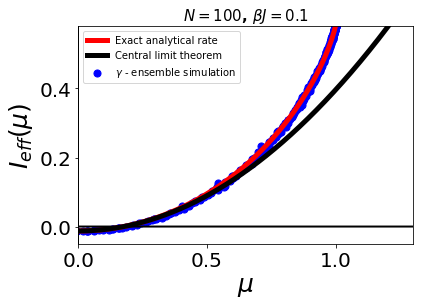

In [155]:
xn = np.arange(-50, 50, 0.001)
muprime = mu[:-1]
N = 100

# Exact answer

def lam(x):
    return np.log((np.sqrt(np.exp(2*bJ)*(1-x*x) + np.exp(-2*bJ)*x*x) + np.exp(-bJ))  /  (2*np.cosh(bJ)*np.sqrt(1-x*x)))
def rate(x):
    return x*reverseEos(x) - lam(x)
def prob(x):
    return np.exp(-N*rate(x))
a = integrate.quad(lambda x: prob(x), -1, 1, full_output=1)[0]
def normprob(x):
    return (1/a)*prob(x)

# Central limit theorem

def gamma2(x):
    return np.exp(-2*bJ)*x
def lam2(x):
    return (1/2)*np.exp(-2*bJ)*x*x
def rate2(x):
    return x*gamma2(x) - lam2(x)
def prob2(x):
    return np.exp(-N*rate2(x))
b = integrate.quad(lambda x: prob2(x), -1, 1, full_output=1)[0]
def normprob2(x):
    return (1/b)*prob2(x)

# γ-ensemble LDT approach

Inew = N*np.negative(I)
P = np.exp(Inew)

C = np.trapz(muprime, P)
Pnorm = (1/C) * P
Ieff= (-1/N)*np.log(Pnorm)

# Plotting 

plt.scatter(muprime, Ieff, color='blue', s=50, label=r'$\gamma$ - ensemble simulation')
plt.plot(xn, -(1/N)*np.log(normprob(xn)), lw=5, color='red', label='Exact analytical rate')
plt.plot(xn, -(1/N)*np.log(normprob2(xn)), lw=5, color='black', label='Central limit theorem')

plt.plot(xn, 0*xn, color='black', lw=2)
plt.vlines(0, -0.05, 0.6, color='black', lw=2)

plt.xlim(0, 1.3)
plt.ylim(-0.05, 0.58)
plt.xlabel(r'$\mu$', fontsize='25')
plt.ylabel(r'$I_{eff}(\mu)$', fontsize='25')
plt.tick_params(labelsize=20)
plt.title(r'$N=100$, $\beta J = 0.1$', fontsize= 15, fontweight='bold')
plt.legend(loc='upper left')
plt.savefig('/Users/κωτς/Desktop/1dising-ratescomparison.pdf', transparent=True, bbox_inches='tight')
#plt.show()